## Some visualizations

In [7]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
from scipy.spatial import distance
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import tree

from DeepWorkOut import Analyzer
from DeepWorkOut import MultiAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [8]:
folderPath = 'C:\\Users\\ufxds\\Desktop\\DeepWorkOut\\PostAnalysis\\Analysed_pandas\\'
DLCscorer = 'DLC_resnet101_DeepWorkOutJan31shuffle3_100000'
fps = 30
multiVideos = MultiAnalyzer(folderPath, DLCscorer, fps)


### Plot the velocity of knee (crunch exercise)

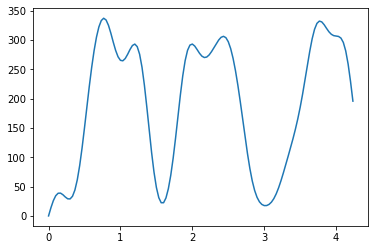

In [12]:
velocity = multiVideos.videos[21].get_velocity('kneeleft', interpolate=True, reduce_noise=True, in_centi_sec=True)
multiVideos.videos[25].plotFeatures(velocity)

In [13]:
needed_bodyparts = ['ankleleft', 'forehead', 'shoulderleft', 'kneeleft', 'hipleft', 'elbowleft']
unvalid_videos = multiVideos.clean_data(needed_bodyparts, pcutoff = 0.5, min_rate = 0.9)
print(str(len(unvalid_videos)) + ' videos were removed.')

multiVideos.calibrate_metric('ankleleft', 'kneeleft', 42.0)

11 videos were removed.


### Plot the cleaned postions of crunch exercise

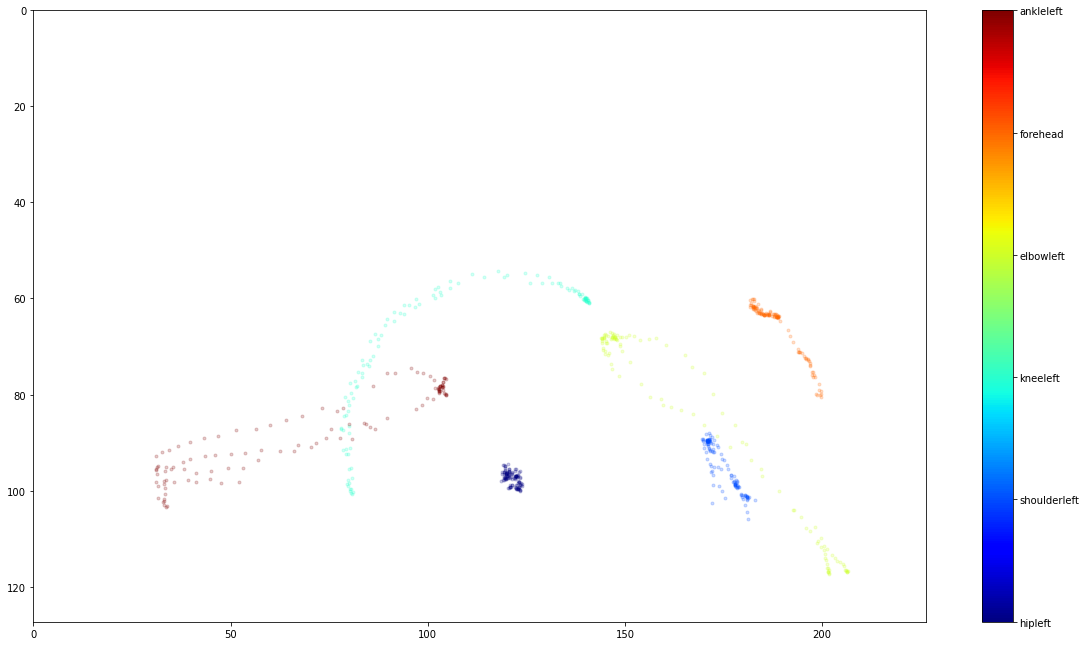

<Figure size 1440x810 with 0 Axes>

In [14]:
valid_bpts = list(multiVideos.getValidBodyparts())
multiVideos.videos[20].PlottingResults(bodyparts2plot=valid_bpts, pcutoff=0.0000001, alphavalue=.2,colormap='jet',fs=(20,11.25))

### Plot the correlation between different bodyparts (here of xcoords)

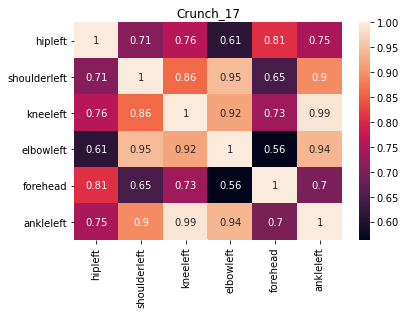

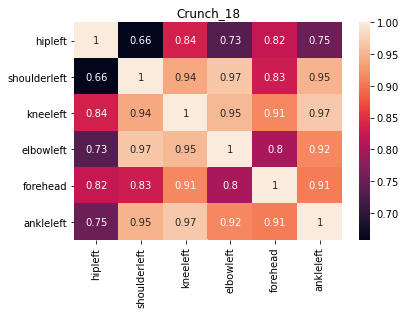

In [18]:
correlations = []
videos = multiVideos.videos
for video in videos[21:23]:
    data = []
    for bp in valid_bpts:
        data.append(video.get_Xcoordinates(bp, interpolate=True, reduce_noise=True, in_centi=True))
    df = pd.DataFrame(np.array(data).T, columns=valid_bpts)
    correlations.append(df.corr())
    ax = sns.heatmap(df.corr(), annot=True) 
    #sns.pairplot(df, kind="kde")
    ax.set_title(video.name)
    plt.show()


### Plot a feature of multiple videos to compare (here velocity of the knee)

Text(0.5, 0.98, 'All excercises with the velocity of kneeleft')

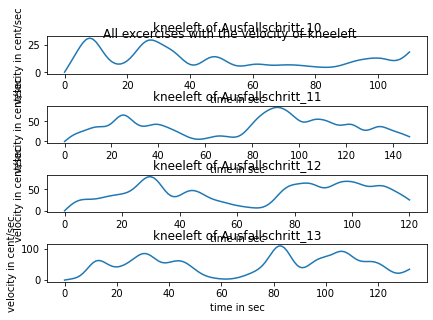

In [19]:

fig, axs = plt.subplots(len(videos[1:5]))
fig.tight_layout()
bp = 'kneeleft'
for i in range(len(videos[1:5])):
    video = videos[i]
    values = video.get_velocity(bp, interpolate=True, reduce_noise=True, in_centi_sec=True)
    axs[i].plot(values)
    axs[i].set_title(bp + ' of ' + video.name)
    axs[i].set_xlabel('time in sec')
    axs[i].set_ylabel('velocity in cent/sec')

fig.suptitle('All excercises with the velocity of ' + bp)